In [1]:
import shap
from rfgap import RFGAP
from rfphate import RFPHATE
from phate import PHATE

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pi_test_functions import linear_sum, exponential_difference, exponential_interaction
from sklearn.metrics import mean_squared_error

from sklearn.datasets import fetch_openml

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
np.random.seed(42)
x = np.random.multivariate_normal(np.zeros((10, )), np.eye(10), 1000)
y = linear_sum(x)

x_test = np.random.multivariate_normal(np.zeros((10, )), np.eye(10), 250)
y_test = linear_sum(x_test)

In [3]:
rf = RFGAP(prediction_type = 'regression', oob_score = mean_squared_error, random_state = 42, min_samples_split = 1)
rf.fit(x, y)

In [4]:
prox = rf.get_proximities().toarray()
prox_test = rf.prox_extend(x_test)

In [5]:
# Still set up for OOB predictions?

# explainer_oob_prox = shap.Explainer(rf.prox_predict, x)
# shap_values_oob_prox = explainer_oob_prox(x)

# Should this be x or x_test (in Explainer)?
explainer = shap.Explainer(rf.predict, x)
shap_values = explainer(x_test)

# explainer_prox = shap.Explainer(rf.prox_predict, x)
# shap_values_prox = explainer_prox(x_test)


explainer_train = shap.Explainer(rf.predict, x)
shap_values_train = explainer_train(x)

# # TODO: Set up to work with OOB predictions
# explainer_train_prox = shap.Explainer(rf.prox_predict, x)
# shap_values_train_prox = explainer_train_prox(x)

ExactExplainer explainer: 251it [01:44,  2.23it/s]                         
ExactExplainer explainer: 1001it [06:46,  2.40it/s]                          


In [6]:
s = shap_values_train.values
base_value = shap_values_train.base_values[0]

In [7]:
s_test = shap_values.values
base_test = shap_values.base_values[0]

In [8]:
# Can I get the true y from shap values? If yes, then decompose prox-weighted sum

In [9]:
# How to get shap values pertaining to the oob predictions?
# Perhaps instead of shap.Explainer(rf.predict, x_test), we do shap.Explainer(rf.prox_predict, x_train)? Or something like that?
# Problem: prox_predict only requires y

In [10]:
y_est = rf.predict(x)

In [11]:
shap_est = np.sum(prox @ s, axis = 1) + shap_values_train.base_values[0]

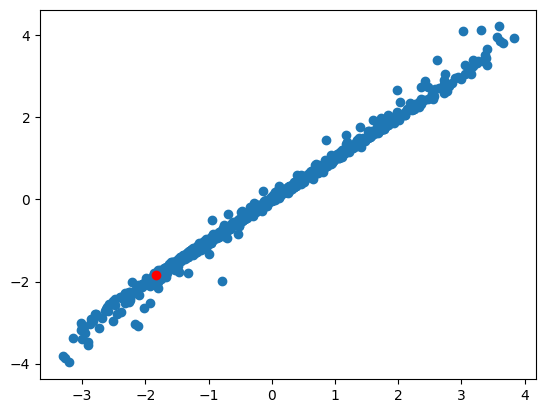

In [12]:
plt.scatter(shap_est, y_est)
plt.scatter(shap_est[10], y_est[10], color = 'red')

<Axes: >

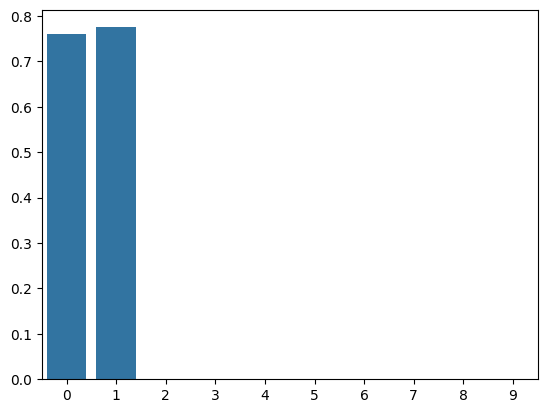

In [13]:
sns.barplot(np.mean(abs(prox @ s), axis = 0))

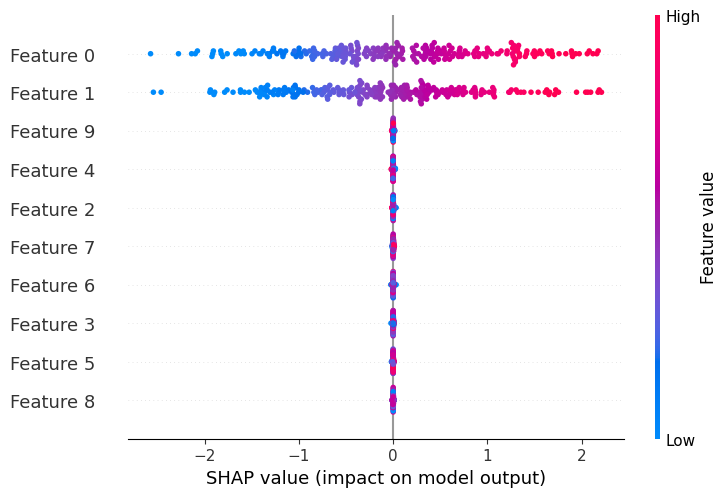

In [14]:
shap.plots.beeswarm(shap_values)

<Axes: >

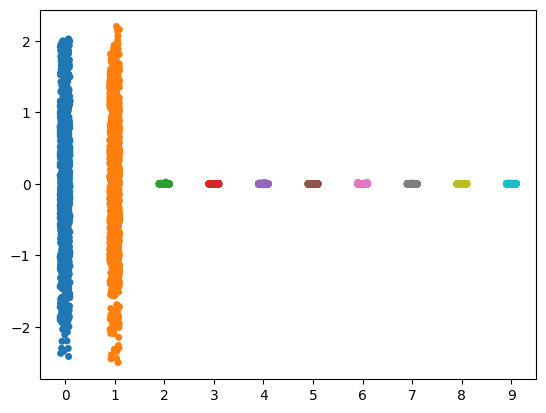

In [15]:
sns.stripplot(prox @ s)

<Axes: >

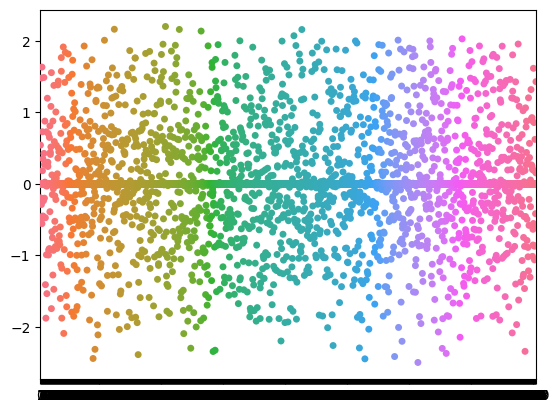

In [16]:
sns.stripplot((prox @ s).T)

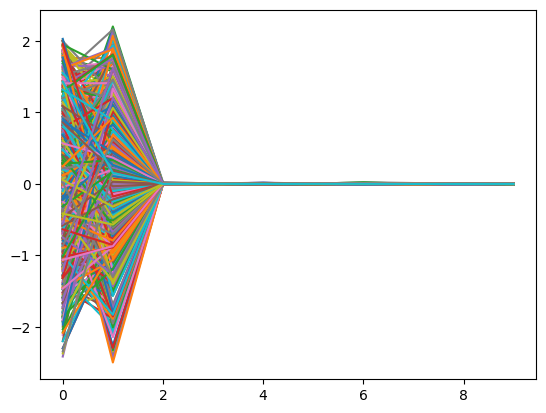

In [17]:
plt.plot((prox @ s).T)

<Axes: >

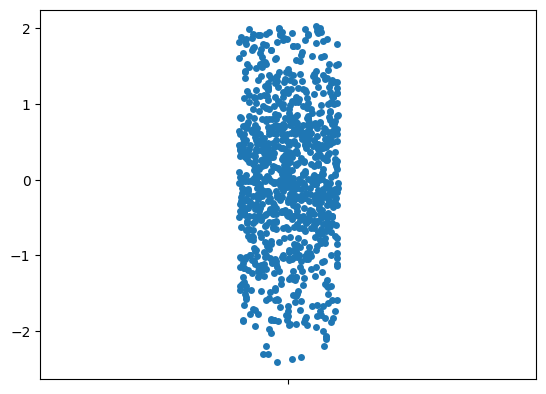

In [18]:
sns.stripplot((prox @ s[:, 0]))

<Axes: >

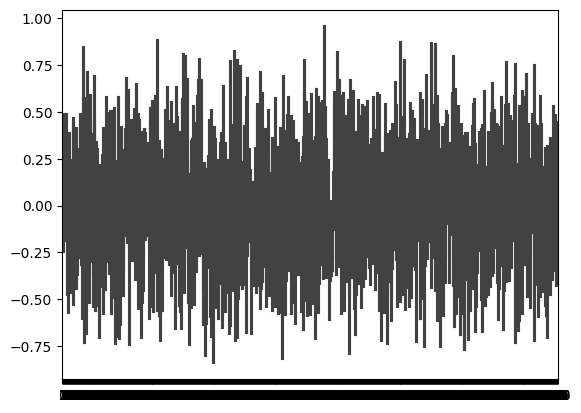

In [19]:
sns.barplot((prox @ s).T)

In [20]:
(prox @ s)[0, :]

array([ 5.42299653e-01, -1.94633272e-01, -1.17997174e-03, -3.59654661e-04,
       -5.91357912e-05, -6.58523770e-04,  6.06989029e-05,  1.55095246e-03,
        2.25018280e-05,  3.92597903e-04])

<Axes: ylabel='Density'>

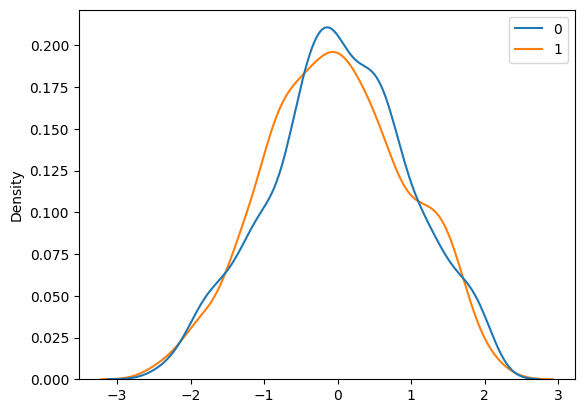

In [21]:
sns.kdeplot((prox @ s)[:, :2])

In [22]:
prox_test @ y_est

array([-0.90663687,  1.70780452,  2.11739862,  1.71963461, -0.13333969,
       -1.10986129,  0.29788767, -1.50245773,  0.73331881, -1.60165744,
        1.5612287 ,  1.1009854 ,  1.65387665, -0.64937729,  0.56771376,
       -0.900608  , -1.66035997,  2.71533978, -1.28638749, -1.15429869,
        0.55003553,  0.10478483,  1.0716217 , -0.33317123,  0.97213998,
        0.50568518,  0.8910159 , -0.78887479,  0.31466347, -2.38107461,
        0.92082403, -0.487461  ,  0.87271169, -1.3310258 , -2.25728168,
       -1.38458646, -0.77195565, -0.99439725,  3.0590507 , -0.8295106 ,
       -0.12140126,  0.20427696,  1.39554993,  0.64236202, -0.89412239,
       -0.33260541, -2.25183235,  0.61387246,  0.84889486, -0.94460398,
        2.84866076, -0.97097544, -0.24821636,  1.1941049 , -1.23616916,
       -1.90177491,  0.30296093, -2.30449799,  0.82351329, -0.67568578,
        0.50277592,  0.93187037,  0.03724488,  1.26092901, -0.31886496,
       -0.00929681,  1.65226299,  0.6689858 , -0.80256648,  0.49

In [23]:
rf.predict(x_test)

array([-0.9180589 ,  1.70900768,  2.12455728,  1.72110923, -0.13100977,
       -1.12853072,  0.30701701, -1.50944413,  0.74765637, -1.60701585,
        1.56263246,  1.13098986,  1.73545468, -0.66403158,  0.56792414,
       -0.90937368, -1.6622572 ,  2.74595032, -1.28705032, -1.15293833,
        0.54647256,  0.1029718 ,  1.07842338, -0.32757786,  0.96203586,
        0.48983927,  0.90285611, -0.78791198,  0.31365181, -2.38665191,
        0.92756618, -0.48223264,  0.87347337, -1.32740484, -2.31100338,
       -1.37908648, -0.77342527, -0.99587438,  3.16218436, -0.88110378,
       -0.12511239,  0.21343109,  1.39962683,  0.62761871, -0.88208449,
       -0.3417895 , -2.24370483,  0.61648575,  0.8542368 , -0.93771416,
        2.8736511 , -0.96965454, -0.24600455,  1.18565864, -1.23504591,
       -1.91469848,  0.28813464, -2.33910889,  0.91408354, -0.6693371 ,
        0.51168243,  0.93236772,  0.02943242,  1.26312564, -0.31885862,
       -0.00899045,  1.65443652,  0.67892874, -0.79941909,  0.48

In [24]:
print(s.shape)
print(s_test.shape)
print(prox.shape)
print(prox_test.shape)

(1000, 10)
(250, 10)
(1000, 1000)
(250, 1000)


In [25]:
np.sum(prox_test @ s, axis = 0)

array([ 1.36088337e+01, -2.25400341e+01,  6.94986660e-02,  9.38589653e-02,
       -1.77472362e-01, -7.66562544e-02, -7.18520406e-02,  1.36699904e-01,
       -1.84934463e-02, -1.77285973e-02])

In [26]:
shap_values.values.sum(axis = 0)

array([ 1.24460579e+01, -2.13161762e+01,  7.14212608e-02,  1.84848115e-02,
       -1.60642482e-01, -1.58700163e-01, -1.86971654e-02,  8.88300475e-02,
       -2.69911927e-02, -1.35001793e-01])

In [27]:
rf.predict(x_test)

array([-0.9180589 ,  1.70900768,  2.12455728,  1.72110923, -0.13100977,
       -1.12853072,  0.30701701, -1.50944413,  0.74765637, -1.60701585,
        1.56263246,  1.13098986,  1.73545468, -0.66403158,  0.56792414,
       -0.90937368, -1.6622572 ,  2.74595032, -1.28705032, -1.15293833,
        0.54647256,  0.1029718 ,  1.07842338, -0.32757786,  0.96203586,
        0.48983927,  0.90285611, -0.78791198,  0.31365181, -2.38665191,
        0.92756618, -0.48223264,  0.87347337, -1.32740484, -2.31100338,
       -1.37908648, -0.77342527, -0.99587438,  3.16218436, -0.88110378,
       -0.12511239,  0.21343109,  1.39962683,  0.62761871, -0.88208449,
       -0.3417895 , -2.24370483,  0.61648575,  0.8542368 , -0.93771416,
        2.8736511 , -0.96965454, -0.24600455,  1.18565864, -1.23504591,
       -1.91469848,  0.28813464, -2.33910889,  0.91408354, -0.6693371 ,
        0.51168243,  0.93236772,  0.02943242,  1.26312564, -0.31885862,
       -0.00899045,  1.65443652,  0.67892874, -0.79941909,  0.48

In [28]:
shap_est_test = np.sum(prox_test @ s, axis = 1) + shap_values_train.base_values[0]

In [29]:
shap_est_test

array([-0.90663687,  1.70780452,  2.11739862,  1.71963461, -0.13333969,
       -1.10986129,  0.29788767, -1.50245773,  0.73331881, -1.60165744,
        1.5612287 ,  1.1009854 ,  1.65387665, -0.64937729,  0.56771376,
       -0.900608  , -1.66035997,  2.71533978, -1.28638749, -1.15429869,
        0.55003553,  0.10478483,  1.0716217 , -0.33317123,  0.97213998,
        0.50568518,  0.8910159 , -0.78887479,  0.31466347, -2.38107461,
        0.92082403, -0.487461  ,  0.87271169, -1.3310258 , -2.25728168,
       -1.38458646, -0.77195565, -0.99439725,  3.0590507 , -0.8295106 ,
       -0.12140126,  0.20427696,  1.39554993,  0.64236202, -0.89412239,
       -0.33260541, -2.25183235,  0.61387246,  0.84889486, -0.94460398,
        2.84866076, -0.97097544, -0.24821636,  1.1941049 , -1.23616916,
       -1.90177491,  0.30296093, -2.30449799,  0.82351329, -0.67568578,
        0.50277592,  0.93187037,  0.03724488,  1.26092901, -0.31886496,
       -0.00929681,  1.65226299,  0.6689858 , -0.80256648,  0.49

<Axes: >

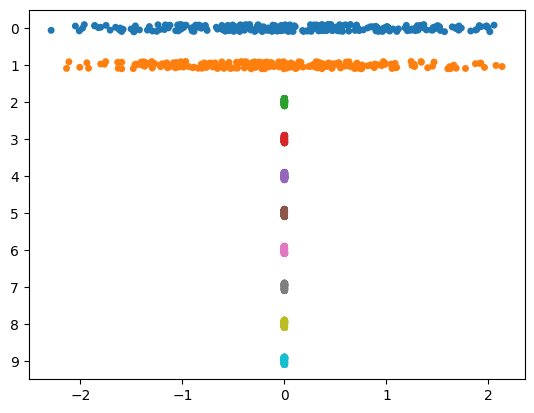

In [30]:
sns.stripplot(prox_test @ s, orient='h')

Text(0.5, 1.0, 'Test SHAP Values')

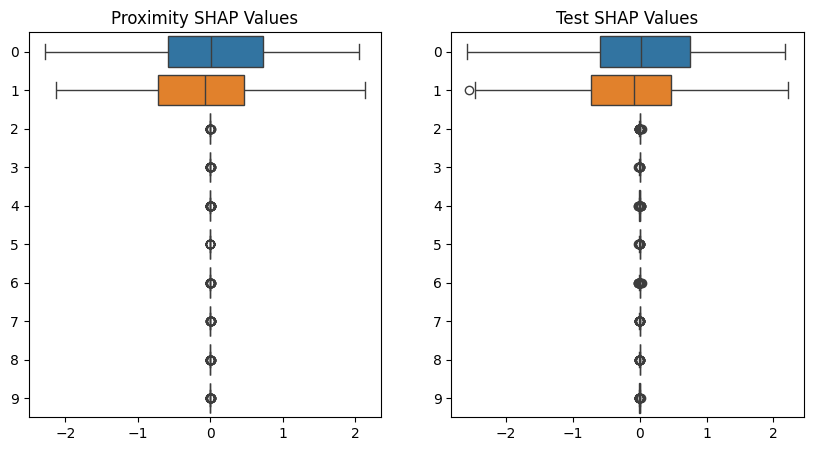

In [42]:
fit, axes = plt.subplots(1, 2, figsize = (10, 5))

sns.boxplot(prox_test @ s, orient='h', ax = axes[0]).set_title('Proximity SHAP Values')
sns.boxplot(shap_values.values, orient='h', ax = axes[1]).set_title('Test SHAP Values')

In [47]:
shap_values.values.shape

(250, 10)

<Axes: ylabel='Density'>

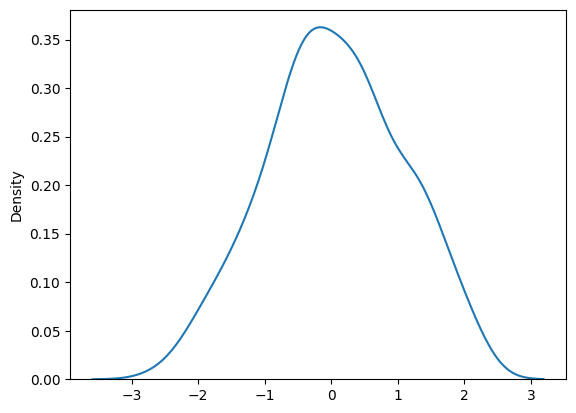

In [59]:
sns.kdeplot(shap_values.values[:, 0])

<Axes: ylabel='Density'>

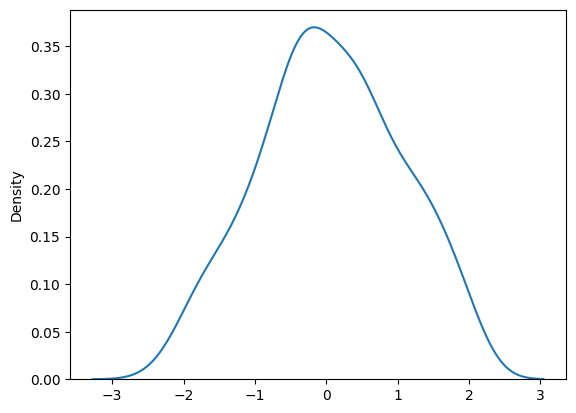

In [60]:
sns.kdeplot((prox_test @ s)[:, 0])

In [58]:
shap_values.values[0]

array([-6.16719361e-01, -3.52502632e-01,  2.65708894e-03, -2.84542348e-04,
        4.34997842e-05, -1.01331012e-03, -1.04905798e-03,  2.50942983e-03,
       -2.05663646e-03, -8.55156283e-04])

In [65]:
np.corrcoef(shap_values.values[:, 1], (prox_test @ s)[:, 1])

array([[1.        , 0.99833482],
       [0.99833482, 1.        ]])

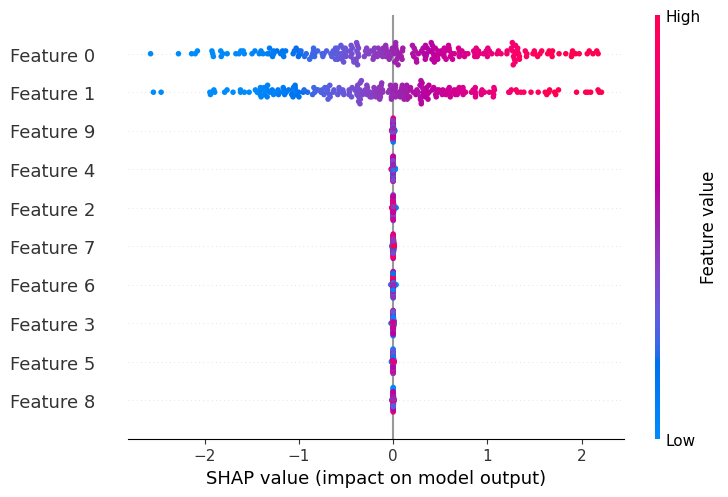

In [33]:
shap.plots.beeswarm(shap_values)

In [34]:
phate_op = PHATE(n_components = 2, knn_dist = 'precomputed')
emb = phate_op.fit_transform(prox)

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1000 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 0.05 seconds.
  Calculating optimal t...


divide by zero encountered in divide
invalid value encountered in divide


    Automatically selected t = 2
  Calculated optimal t in 0.67 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.07 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.92 seconds.
Calculated PHATE in 1.73 seconds.


<Axes: >

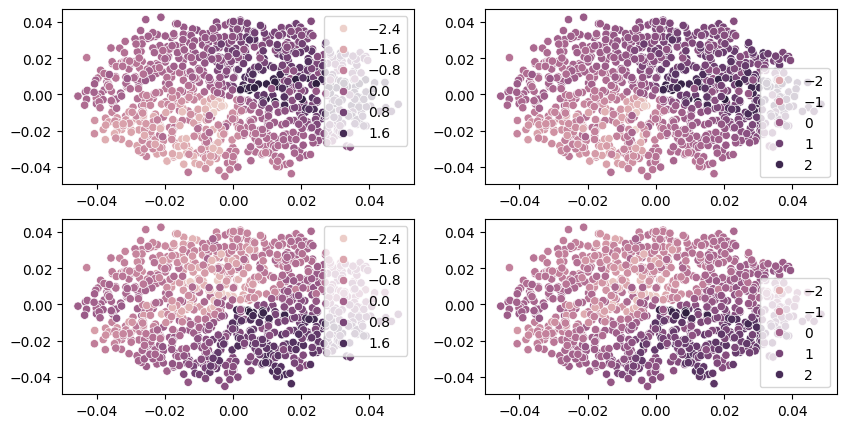

In [35]:
fig, axes = plt.subplots(2, 2, figsize = (10, 5))


sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = (prox @ s)[:, 0], ax = axes[0, 0])
sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = s[:, 0], ax = axes[0, 1])
sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = (prox @ s)[:, 1], ax = axes[1, 0])
sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = s[:, 1], ax = axes[1, 1])

In [36]:
phate_op_test = PHATE(n_components = 2)
emb_test = phate_op_test.fit_transform(x_test)

Calculating PHATE...
  Running PHATE on 250 observations and 10 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 27
  Calculated optimal t in 0.05 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.03 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.12 seconds.
Calculated PHATE in 0.22 seconds.


In [37]:
emb_test.shape

(250, 2)

<Axes: >

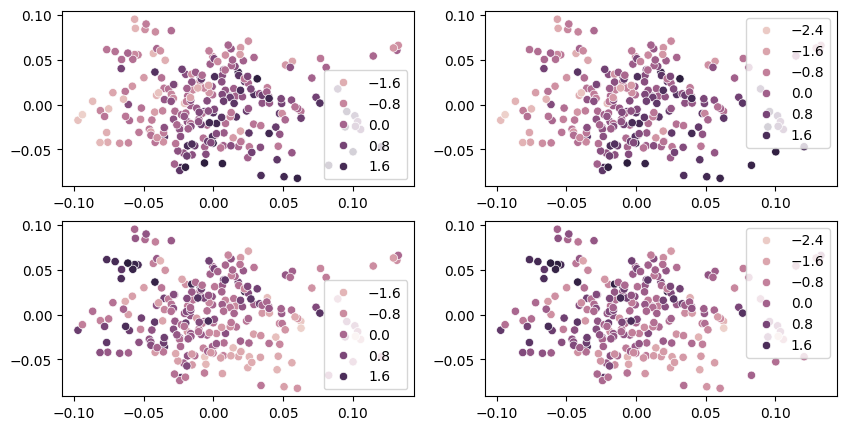

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.scatterplot(x=emb_test[:, 0], y=emb_test[:, 1], hue=(prox_test @ s)[:, 0], ax=axes[0, 0])
sns.scatterplot(x=emb_test[:, 0], y=emb_test[:, 1], hue=s_test[:, 0], ax=axes[0, 1])
sns.scatterplot(x=emb_test[:, 0], y=emb_test[:, 1], hue=(prox_test @ s)[:, 1], ax=axes[1, 0])
sns.scatterplot(x=emb_test[:, 0], y=emb_test[:, 1], hue=s_test[:, 1], ax=axes[1, 1])


In [39]:
np.max(prox @ s - s)

1.0917957989325449